## Using the Supervised Tuning Methods

This notebook contains examples on how to use the supervised_tuner module. Although the examples are for classification problems the same principles can be used for regression problems. Note both the eval_model() and tune_test_model() functions return dictionaries containing containing: 

- 'model': final model fit (full data refit for param tuning and final cv data fit for eval) 
- 'metrics': dictionary containing key (metric) value (list of cv score) pairs during model eval
- 'fin_cv_df': final cv data with predictions
- 'params': parameters of model  
- 'features': list of features used in model fitting
- 'log_data': empty dictionary if no log wanted, else all data that is to be logged 

The following classification and regression methods are currently fully supported (parameter to pass in: sklearn model initiated):

In [13]:
from eagles.Supervised import model_support

model_support.print_classifiers()
print('\n')
model_support.print_regressors()

Supoorted Classification Models


,Abbreviation,Model
0,rf_clf,RandomForestClassifier
1,et_clf,ExtraTreesClassifier
2,gb_clf,GradientBoostingClassifier
3,dt_clf,DecisionTreeClassifier
4,logistic,LogisticRegression
5,svc,SVC
6,knn_clf,KNeighborsClassifier
7,nn,MLPClassifier
8,ada_clf,AdaBoostClassifier
9,vc_clf,VotingClassifier


Voting Classifier Defaults: Random Forest Classifier x Logistic Regression

Classification Metrics:
['accuracy', 'f1', 'precision', 'recall', 'roc_auc', 'precision_recall_auc']


Supoorted Regression Models


,Abbreviation,Model
0,rf_regress,RandomForestRegressor
1,et_regress,ExtraTreesRegressor
2,gb_regress,GradientBoostingRegressor
3,dt_regress,DecisionTreeRegressor
4,linear,LinearRegression
5,lasso,Lasso
6,ridge,Ridge
7,elastic,ElasticNet
8,poisson,PoissonRegressor
9,svr,SVR


Voting Regressor Defaults: Random Forest Regressor x Linear Regression

Regressor Metrics:
['mse', 'rmse', 'mae', 'mape', 'r2']


In [14]:
from eagles.Supervised.tuner import SupervisedTuner

from eagles.data_sets import data_loader as dl

Load in the iris dataset for classification and regression tuning examples

In [15]:
iris = dl.load_iris()

# create a dummy ft for the 
iris['dummy'] = iris['species'].apply(lambda x: 1 if x =='setosa' else 0)

# define the feature columns
fts = [ft for ft in iris.columns if ft != 'species' and ft != 'dummy']

print(iris.shape)

(150, 6)


## Binary Classification with logistic regression

Performing CV Runs: 5
Finished cv run: 1 time: 0.0345
Finished cv run: 2 time: 0.0478
Finished cv run: 3 time: 0.0339
Finished cv run: 4 time: 0.0427
Finished cv run: 5 time: 0.0327


,cv run,accuracy_scores,f1_scores,roc_auc_scores
0,1,1.0,1.0,1.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,5,1.0,1.0,1.0
5,mean,1.0,1.0,1.0
6,std,0.0,0.0,0.0


Final cv train test split
accuracy score: 1.0
f1 score: 1.0
roc_auc score: 1.0
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



,probab_bin,count,percent_actual
11,"(-0.05, 0.0]",0,NaN
0,"(0.0, 0.05]",20,0.0
3,"(0.05, 0.1]",1,0.0
19,"(0.1, 0.15]",0,NaN
18,"(0.15, 0.2]",0,NaN
17,"(0.2, 0.25]",0,NaN
16,"(0.25, 0.3]",0,NaN
15,"(0.3, 0.35]",0,NaN
14,"(0.35, 0.4]",0,NaN
13,"(0.4, 0.45]",0,NaN


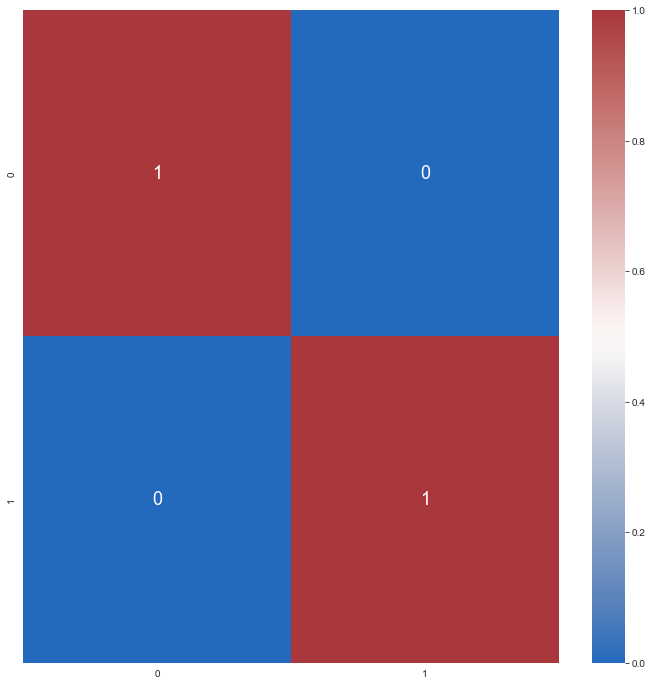

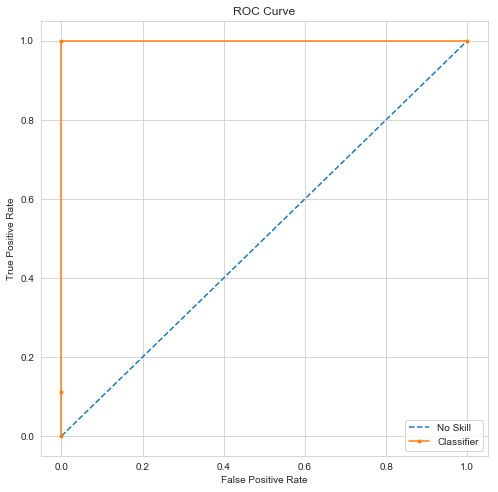

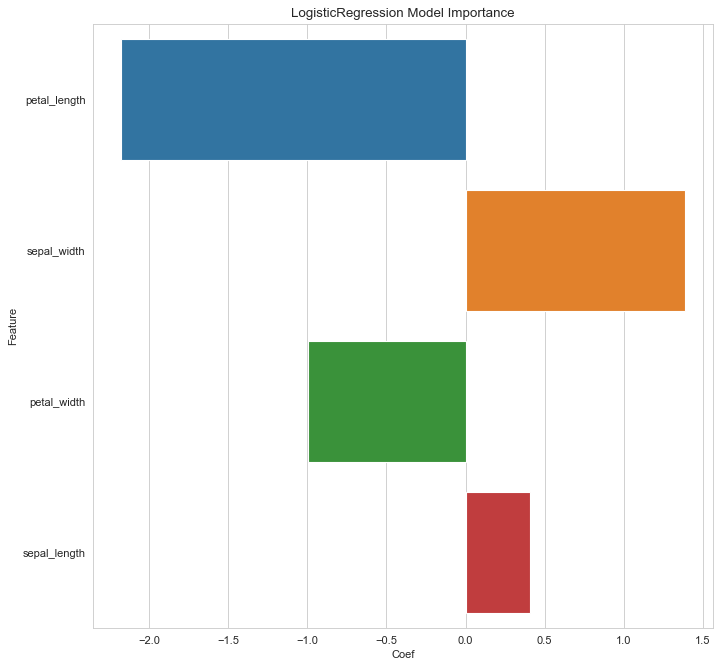

In [16]:
tuner = SupervisedTuner(
    problem_type="binary",
    eval_metrics=["accuracy", "f1", "roc_auc"],
    num_cv=5,
    bins=None,
    num_top_fts=None,
    get_ft_imp=True,
    random_seed=4,
    disp=True,
    log="log",
    log_name="model_eval_test.txt",
    log_path=None,
    log_note="This is a test of the model eval function",
)

res = tuner.eval(
    X=iris[fts],
    y=iris["dummy"],
    model="logistic",
    params={"solver": "liblinear"},
    pipe=None,
    scale=None,
    select_features=None,
)

In [17]:
print(res.keys())

dict_keys(['cr', 'cf', 'bt', 'ft_imp_df', 'metric_dictionary', 'model', 'params', 'features'])


## Model Eval Using the scale parameter

Final pipeline: StandardScaler, LogisticRegression, 
Performing CV Runs: 5
Finished cv run: 1 time: 0.0144
Finished cv run: 2 time: 0.0229
Finished cv run: 3 time: 0.0314
Finished cv run: 4 time: 0.0164
Finished cv run: 5 time: 0.0381


,cv run,accuracy_scores,f1_scores,roc_auc_scores
0,1,1.0,1.0,1.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,5,1.0,1.0,1.0
5,mean,1.0,1.0,1.0
6,std,0.0,0.0,0.0


Final cv train test split
accuracy score: 1.0
f1 score: 1.0
roc_auc score: 1.0
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



,probab_bin,count,percent_actual
12,"(-0.05, 0.0]",0,NaN
0,"(0.0, 0.05]",19,0.0
2,"(0.05, 0.1]",1,0.0
3,"(0.1, 0.15]",1,0.0
19,"(0.15, 0.2]",0,NaN
18,"(0.2, 0.25]",0,NaN
17,"(0.25, 0.3]",0,NaN
16,"(0.3, 0.35]",0,NaN
15,"(0.35, 0.4]",0,NaN
14,"(0.4, 0.45]",0,NaN


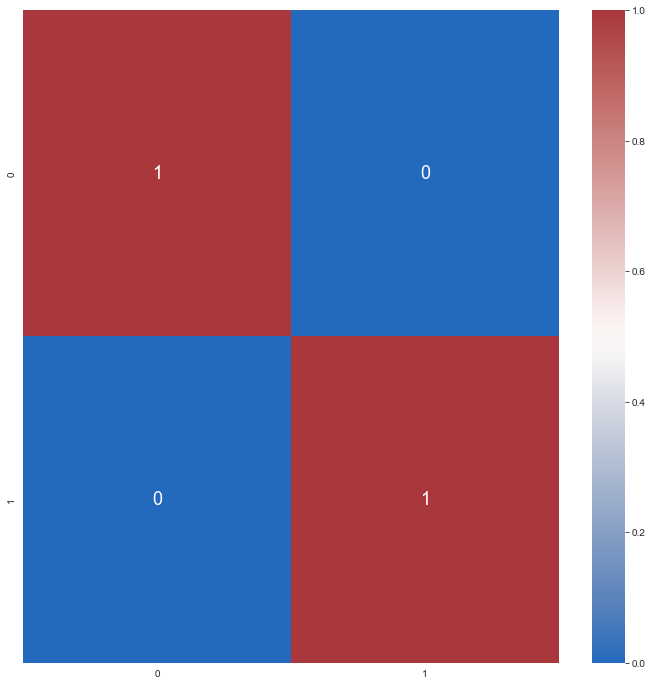

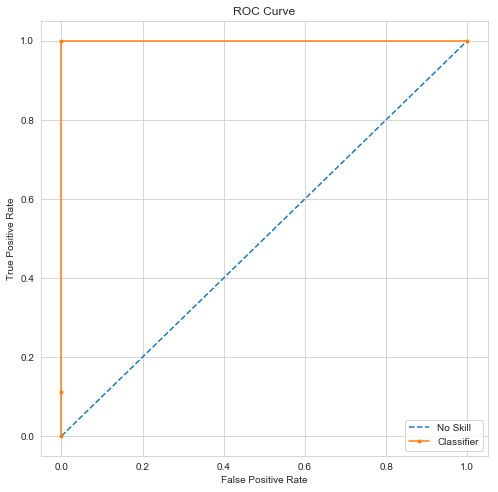

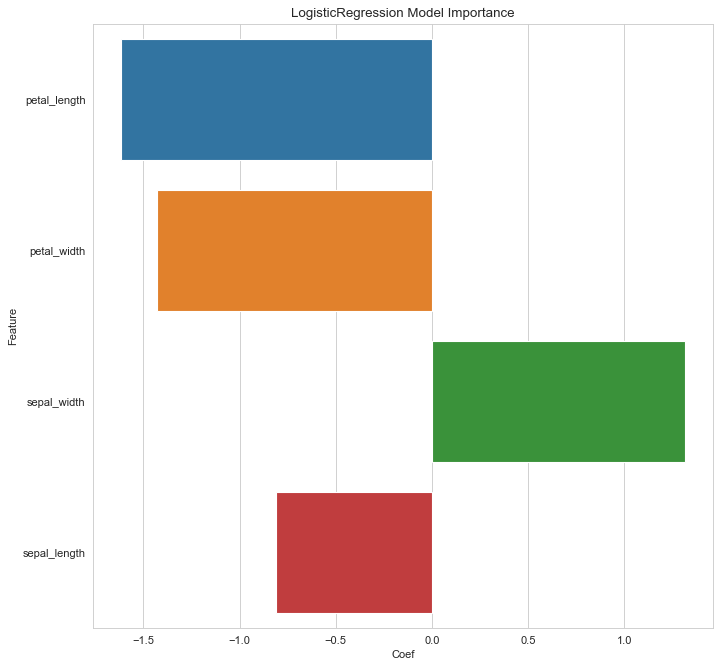

In [18]:
tuner = SupervisedTuner(
    problem_type="binary",
    eval_metrics=["accuracy", "f1", "roc_auc"],
    num_cv=5,
    bins=None,
    num_top_fts=None,
    get_ft_imp=True,
    random_seed=4,
    disp=True,
    log="log",
    log_name="model_eval_test.txt",
    log_path=None,
    log_note="This is a test of the model eval function",
)

res = tuner.eval(
    X=iris[fts],
    y=iris["dummy"],
    model="logistic",
    params={"solver": "liblinear"},
    pipe=None,
    scale="standard",
    select_features=None,
)

## Multi-Class Classification

Final pipeline: SelectFromModel, RandomForestClassifier, 
Performing CV Runs: 5
Finished cv run: 1 time: 0.4468
Finished cv run: 2 time: 0.432
Finished cv run: 3 time: 0.6106
Finished cv run: 4 time: 0.5761
Finished cv run: 5 time: 0.8052


,cv run,f1_scores,precision_scores
0,1,0.945419,0.966667
1,2,0.967059,0.974359
2,3,0.913043,0.914141
3,4,0.967059,0.962963
4,5,0.967963,0.966667
5,mean,0.952109,0.956959
6,std,0.021304,0.021728


Final cv train test split
f1 score: 0.968
precision score: 0.9667
 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



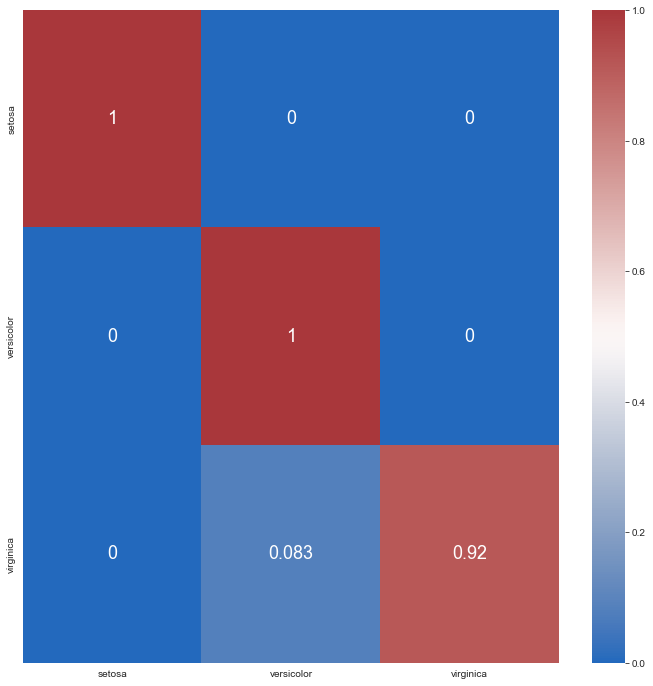

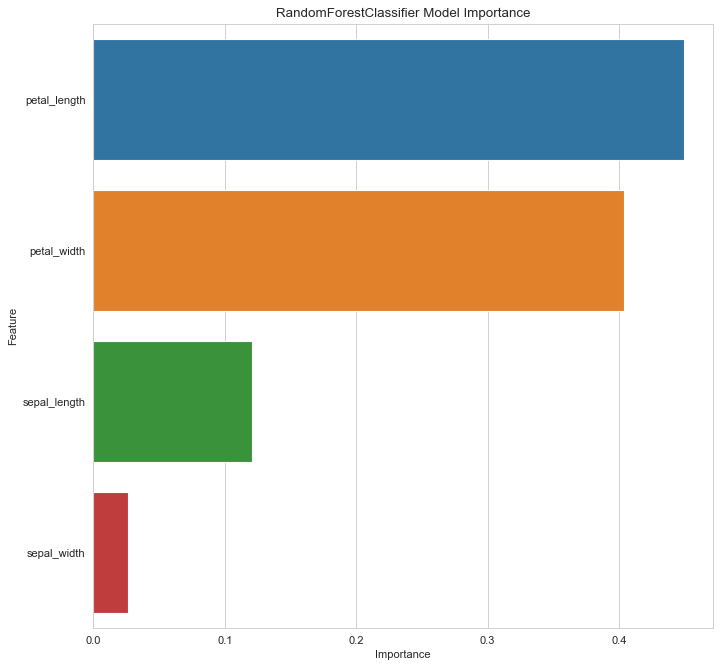

In [19]:
tuner = SupervisedTuner(
    problem_type="multi-class",
    eval_metrics=["f1", "precision"],
    num_cv=5,
    bins=None,
    num_top_fts=None,
    get_ft_imp=True,
    random_seed=4,
    disp=True,
    log="log",
    log_name="model_eval_test.txt",
    log_path=None,
    log_note="This is a test of the model eval function",
)

res = tuner.eval(
    X=iris[fts],
    y=iris["species"],
    model="rf_clf",
    params={'n_estimators':100, 'max_depth':10},
    pipe=None,
    scale=None,
    select_features="select_from_model",
)

## Classification Model Tuning with Feature Selection

**Default select from model is Logisitc Regression with L1 Penalty**

Random Seed Value: None
Final pipeline: SelectFromModel, RandomForestClassifier, 
Performing parameter tuning using: grid_cv
Fitting 5 folds for each of 6 candidates, totalling 30 fits
f1 score of best estimator during parameter tuning: 1.0

Parameters of the best model: 

RandomForestClassifier Parameters
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 473, 'verbose': 0, 'warm_start': False}

Performing CV Runs: 5
Finished cv run: 1 time: 0.2506
Finished cv run: 2 time: 0.1584
Finished cv run: 3 time: 0.2237
Finished cv run: 4 time: 0.2566
Finished cv run: 5 time: 0.2864


,cv run,f1_scores,precision_scores
0,1,1.0,1.0
1,2,1.0,1.0
2,3,1.0,1.0
3,4,1.0,1.0
4,5,1.0,1.0
5,mean,1.0,1.0
6,std,0.0,0.0


Final cv train test split
f1 score: 1.0
precision score: 1.0
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



,probab_bin,count,percent_actual
0,"(-0.05, 0.0]",10,0.0
1,"(0.0, 0.05]",10,0.0
4,"(0.05, 0.1]",1,0.0
15,"(0.1, 0.15]",0,NaN
5,"(0.15, 0.2]",0,NaN
13,"(0.2, 0.25]",0,NaN
19,"(0.25, 0.3]",0,NaN
18,"(0.3, 0.35]",0,NaN
17,"(0.35, 0.4]",0,NaN
16,"(0.4, 0.45]",0,NaN


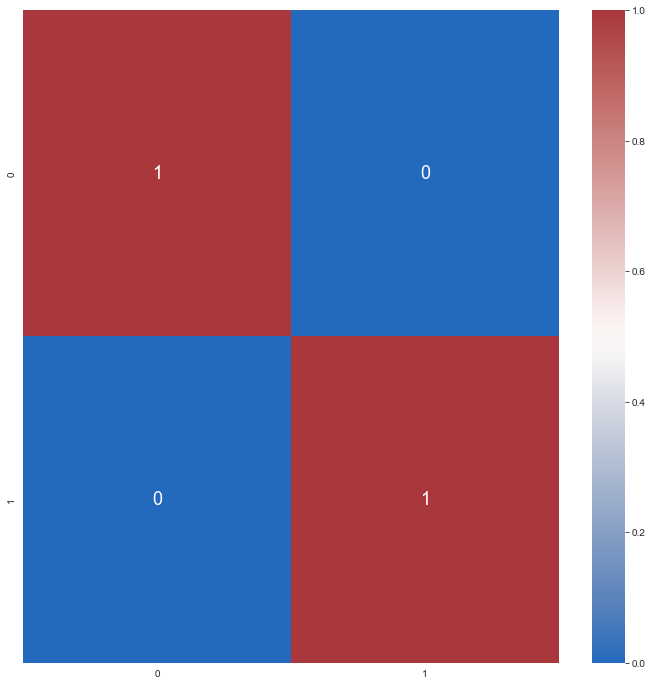

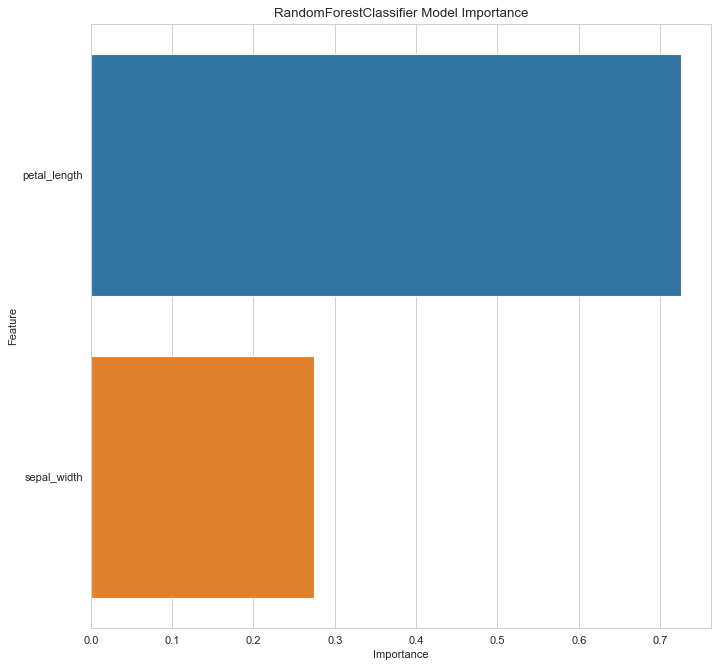

In [20]:
pars = {'n_estimators': [50,100], 'max_depth':[3,5,10]}

tuner = SupervisedTuner(
    problem_type="binary",
    tune_metric='f1',
    tuner="grid_cv",
    eval_metrics=["f1", "precision"],
    num_cv=5,
    bins=None,
    num_top_fts=None,
    get_ft_imp=True,
    random_seed=None,
    n_jobs=2,
    disp=True,
    log="log",
    log_name="model_tunetest_test.txt",
    log_path=None,
    log_note="This is a test of the model param tuning functionality",
)

res = tuner.eval(
    X=iris[fts],
    y=iris["dummy"],
    model="rf_clf",
    params=pars,
    pipe=None,
    scale=None,
    select_features="select_from_model",
)

## Classification Model Tuning Passing in a Pipeline for Feature Selection

Random Seed Value: None
Final pipeline: SelectFromModel, LogisticRegression, 
Performing parameter tuning using: grid_cv
Fitting 5 folds for each of 6 candidates, totalling 30 fits
f1 score of best estimator during parameter tuning: 1.0

Parameters of the best model: 

LogisticRegression Parameters
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 868, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Performing CV Runs: 5
Finished cv run: 1 time: 0.0113
Finished cv run: 2 time: 0.01
Finished cv run: 3 time: 0.0109
Finished cv run: 4 time: 0.0103
Finished cv run: 5 time: 0.0102


,cv run,accuracy_scores,f1_scores
0,1,1.0,1.0
1,2,1.0,1.0
2,3,1.0,1.0
3,4,1.0,1.0
4,5,1.0,1.0
5,mean,1.0,1.0
6,std,0.0,0.0


Final cv train test split
accuracy score: 1.0
f1 score: 1.0
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



,probab_bin,count,percent_actual
11,"(-0.05, 0.0]",0,NaN
0,"(0.0, 0.05]",21,0.0
19,"(0.05, 0.1]",0,NaN
18,"(0.1, 0.15]",0,NaN
17,"(0.15, 0.2]",0,NaN
16,"(0.2, 0.25]",0,NaN
15,"(0.25, 0.3]",0,NaN
14,"(0.3, 0.35]",0,NaN
13,"(0.35, 0.4]",0,NaN
12,"(0.4, 0.45]",0,NaN


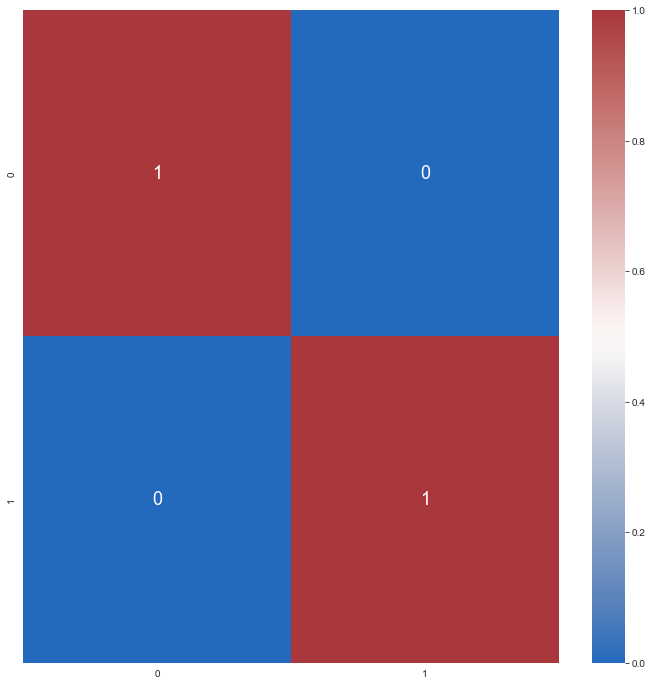

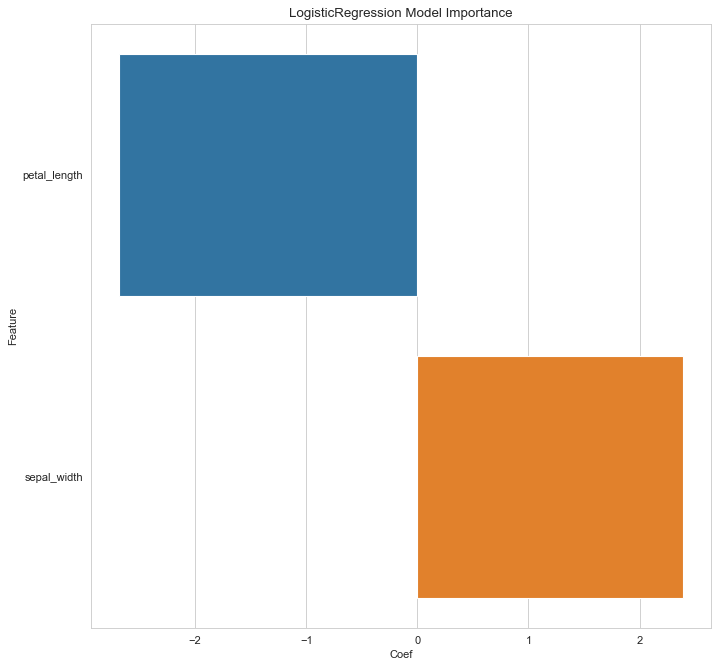

In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

pars = {'solver': ['liblinear']
       , 'penalty':['l1','l2']
       , 'max_iter':[100, 300, 500]
       }

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False)

pipe = Pipeline([('feature_selection', SelectFromModel(lsvc, prefit=False))])


tuner = SupervisedTuner(
    problem_type="binary",
    tune_metric='f1',
    tuner="grid_cv",
    eval_metrics=["accuracy", "f1"],
    num_cv=5,
    bins=None,
    num_top_fts=None,
    get_ft_imp=True,
    random_seed=None,
    n_jobs=2,
    disp=True,
    log="log",
    log_name="model_tunetest_test.txt",
    log_path=None,
    log_note="This is a test of the model param tuning functionality",
)

res = tuner.eval(
    X=iris[fts],
    y=iris["dummy"],
    model="logistic",
    params=pars,
    pipe=pipe,
    scale=None,
    select_features=None,
)

## Classification Model Parameter Tuning using Eagles Feature Selection
**Note default eagles feature selection includes correlation thresholding and logistic regression with l1 penalty. You could also pass it in as a pipeline as such:**

pipe = Pipeline([('feature_selection', EaglesFeatureSelection(methods=['regress']))])

Methods include:
- correlation: correlation threhsold: 
- rf_importance: random forest feature importance thresholding
- regress: l1 penalized regression coefficient selection 
- avg_model_rank: drops bottom percent (default bottom 10%) of feature after fitting random forest and logistic regression

Random Seed Value: None
Final pipeline: EaglesFeatureSelection, LogisticRegression, 
Performing parameter tuning using: grid_cv
Fitting 5 folds for each of 4 candidates, totalling 20 fits
f1 score of best estimator during parameter tuning: 1.0

Parameters of the best model: 

LogisticRegression Parameters
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 300, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 833, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Performing CV Runs: 5
Finished cv run: 1 time: 0.021
Finished cv run: 2 time: 0.0206
Finished cv run: 3 time: 0.0206
Finished cv run: 4 time: 0.0204
Finished cv run: 5 time: 0.0205


/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonlandrigan/eagles_env

,cv run,accuracy_scores,f1_scores,precision_recall_auc_scores
0,1,1.0,1.0,1.000000e+00
1,2,1.0,1.0,1.000000e+00
2,3,1.0,1.0,1.000000e+00
3,4,1.0,1.0,1.000000e+00
4,5,1.0,1.0,1.000000e+00
5,mean,1.0,1.0,1.000000e+00
6,std,0.0,0.0,1.404333e-16


Final cv train test split
accuracy score: 1.0
f1 score: 1.0
precision_recall_auc score: 1.0
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



,probab_bin,count,percent_actual
12,"(-0.05, 0.0]",0,NaN
0,"(0.0, 0.05]",15,0.0
3,"(0.05, 0.1]",1,0.0
4,"(0.1, 0.15]",1,0.0
19,"(0.15, 0.2]",0,NaN
18,"(0.2, 0.25]",0,NaN
17,"(0.25, 0.3]",0,NaN
16,"(0.3, 0.35]",0,NaN
15,"(0.35, 0.4]",0,NaN
14,"(0.4, 0.45]",0,NaN


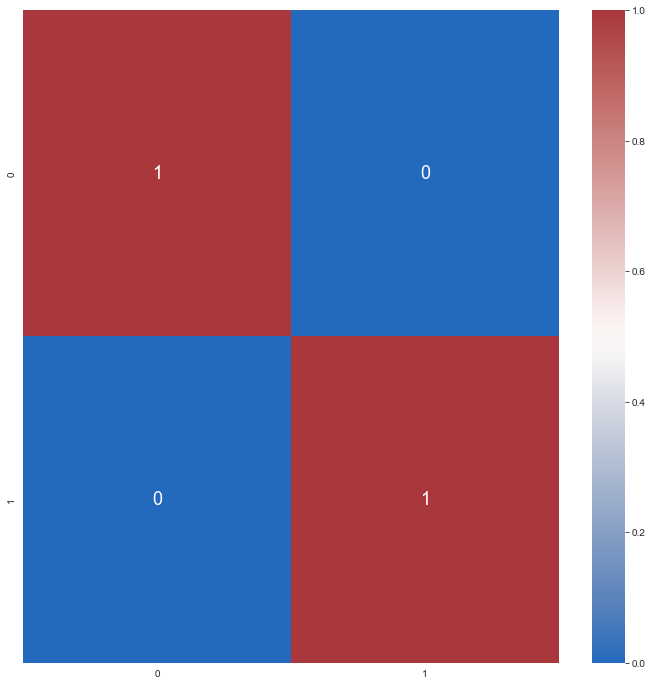

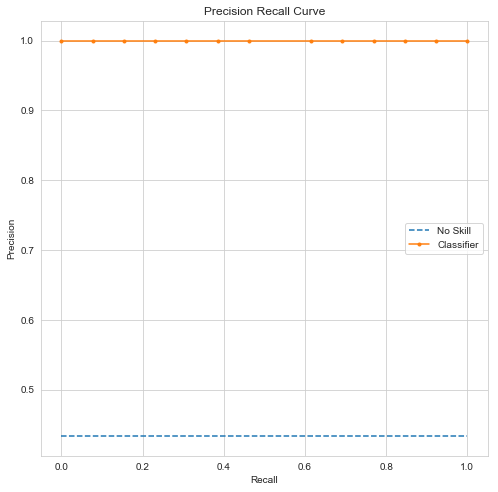

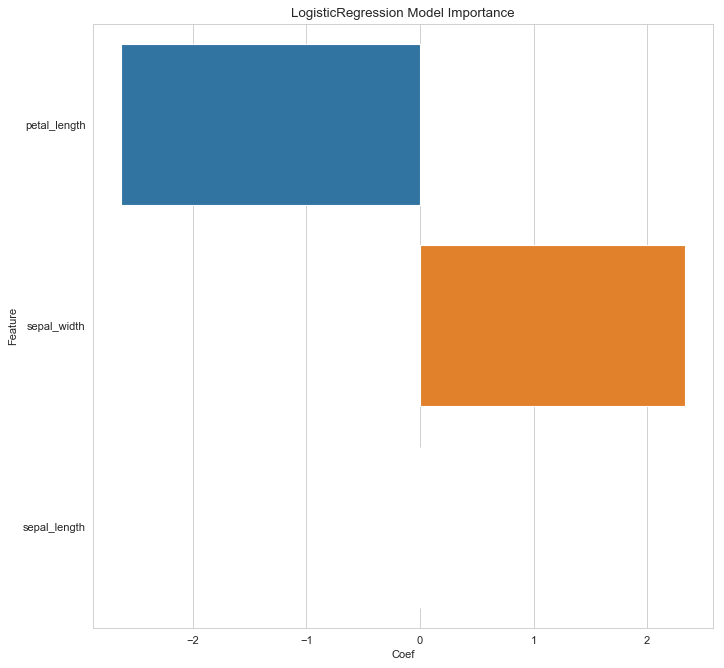

In [22]:
pars = {'solver': ['liblinear']
       , 'penalty':['l1','l2']
       , 'max_iter':[300, 500]
       }

tuner = SupervisedTuner(
    problem_type="binary",
    tune_metric='f1',
    tuner="grid_cv",
    eval_metrics=["accuracy", "f1", "precision_recall_auc"],
    num_cv=5,
    bins=None,
    num_top_fts=None,
    get_ft_imp=True,
    random_seed=None,
    n_jobs=2,
    disp=True,
    log="log",
    log_name="model_tunetest_test.txt",
    log_path=None,
    log_note="This is a test of the model param tuning functionality",
)

res = tuner.eval(
    X=iris[fts],
    y=iris["dummy"],
    model="logistic",
    params=pars,
    pipe=None,
    scale=None,
    select_features="eagles",
)

## Voting Classifier with embedded pipelines

Random Seed Value: None
Final pipeline: EaglesFeatureSelection, VotingClassifier, 
Performing parameter tuning using: grid_cv
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonlandrigan/eagles_env

/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonlandrigan/eagles_env

/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


f1 score of best estimator during parameter tuning: 1.0

Parameters of the best model: 

VotingClassifier Parameters
{'estimators': [('rf', Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('clf', RandomForestClassifier(max_depth=10, random_state=4))])), ('lr', Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scale', MinMaxScaler()),
                ('clf',
                 LogisticRegression(C=0.25, max_iter=1000, random_state=4,
                                    solver='liblinear'))]))], 'flatten_transform': True, 'n_jobs': None, 'verbose': False, 'voting': 'soft', 'weights': [1, 1], 'rf': Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('clf', RandomForestClassifier(max_depth=10, random_state=4))]), 'lr': Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scale', MinMaxScaler()),
                ('clf',
                 LogisticRegression(C=0.25, max_iter=1000, ra

/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Finished cv run: 1 time: 0.6746


/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Finished cv run: 2 time: 0.6291


/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Finished cv run: 3 time: 0.8997


/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Finished cv run: 4 time: 0.9118


/Users/jonlandrigan/eagles_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Finished cv run: 5 time: 1.0505


,cv run,accuracy_scores,f1_scores,precision_scores,precision_recall_auc_scores
0,1,1.0,1.0,1.0,1.000000e+00
1,2,1.0,1.0,1.0,1.000000e+00
2,3,1.0,1.0,1.0,1.000000e+00
3,4,1.0,1.0,1.0,1.000000e+00
4,5,1.0,1.0,1.0,1.000000e+00
5,mean,1.0,1.0,1.0,1.000000e+00
6,std,0.0,0.0,0.0,9.930137e-17


Final cv train test split
accuracy score: 1.0
f1 score: 1.0
precision score: 1.0
precision_recall_auc score: 1.0
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



,probab_bin,count,percent_actual
7,"(-0.05, 0.0]",0,NaN
6,"(0.0, 0.05]",1,0.0
0,"(0.05, 0.1]",10,0.0
2,"(0.1, 0.15]",6,0.0
4,"(0.15, 0.2]",1,0.0
19,"(0.2, 0.25]",0,NaN
5,"(0.25, 0.3]",1,0.0
18,"(0.3, 0.35]",0,NaN
17,"(0.35, 0.4]",0,NaN
16,"(0.4, 0.45]",0,NaN


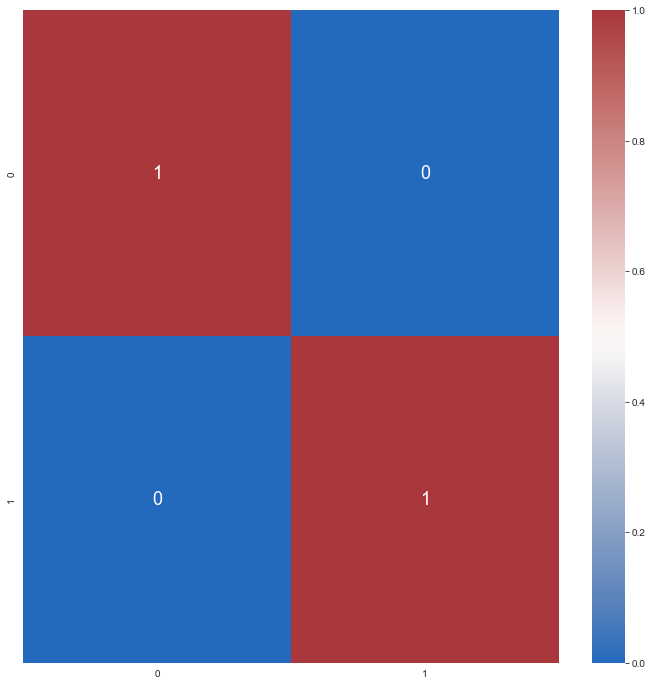

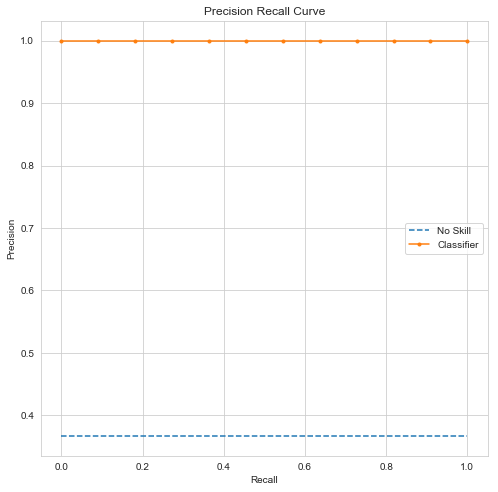

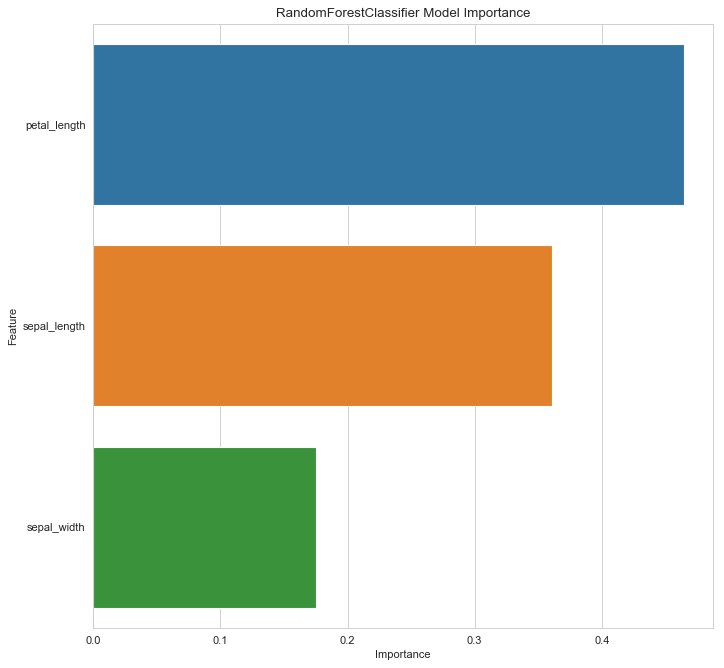

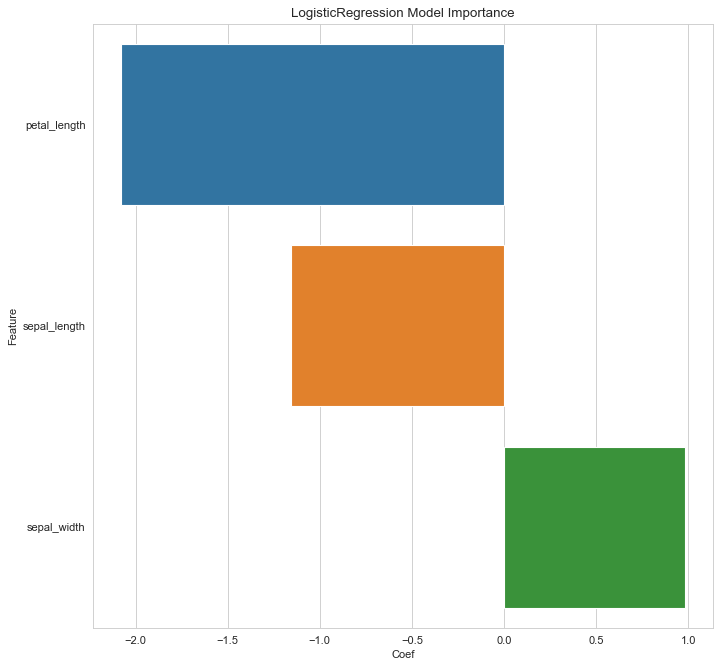

In [23]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from eagles.Supervised.utils.feature_selection import EaglesFeatureSelection

note = """
Voting Classifier with base lr and rf

grid search tuning for f1 for species setsoa

For missing values used median fills with imputer. 

eagles average model rank method used for feature selection
"""


# Define the models  
rf_pipe = Pipeline([('impute', SimpleImputer(strategy='median'))
                    ,('clf', RandomForestClassifier())
                   ])

lr_pipe = Pipeline([('impute', SimpleImputer(strategy='median'))
                    ,('scale', MinMaxScaler())
                    ,('clf', LogisticRegression())
                   ])


vc_clf = VotingClassifier(estimators=[('rf', rf_pipe)
                                      ,('lr', lr_pipe)]
                          , voting='soft')

model_pipe = Pipeline([('feature_selection', EaglesFeatureSelection(methods=['avg_model_rank']))])

# note because there are pipelines embedded within pipelines need to "double" specify 
#the clf to indicate the correct param pointing to within pipelines
pars = {'clf__rf__clf__n_estimators':[x for x in range(100,300,100)]
        ,'clf__rf__clf__max_depth':[10, 20]
        ,'clf__rf__clf__class_weight': [None, 'balanced_subsample']
        ,'clf__rf__clf__random_state':[4]

        ,'clf__lr__clf__penalty': ['l2']
        ,'clf__lr__clf__class_weight':[None, 'balanced']
        ,'clf__lr__clf__max_iter':[1000]
        ,'clf__lr__clf__C': [.25]
        ,'clf__lr__clf__solver':['liblinear']
        ,'clf__lr__clf__random_state':[4] 

        ,'weights':[[1,1],[1,2],[2,1]] 
       }


tuner = SupervisedTuner(
    problem_type="binary",
    tune_metric='f1',
    tuner="grid_cv",
    eval_metrics=["accuracy", "f1", "precision", "precision_recall_auc"],
    num_cv=5,
    bins=None,
    num_top_fts=None,
    get_ft_imp=True,
    random_seed=None,
    n_jobs=2,
    disp=True,
    log=["log","mod","data"],
    log_name="model_tunetest_test.txt",
    log_path=None,
    log_note=note,
)

res = tuner.eval(
    X=iris[fts],
    y=iris["dummy"],
    model=vc_clf,
    params=pars,
    pipe=model_pipe,
    scale=None,
    select_features=None,
)